In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def generate_xor_data(n_points=200, seed=42):
    np.random.seed(seed)
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if (x > 0.5 and y > 0.5) or (x < 0.5 and y < 0.5):
            if len(class_A) < n_points:
                class_A.append([x, y])
        else:
            if len(class_B) < n_points:
                class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A_xor, class_B_xor = generate_xor_data()

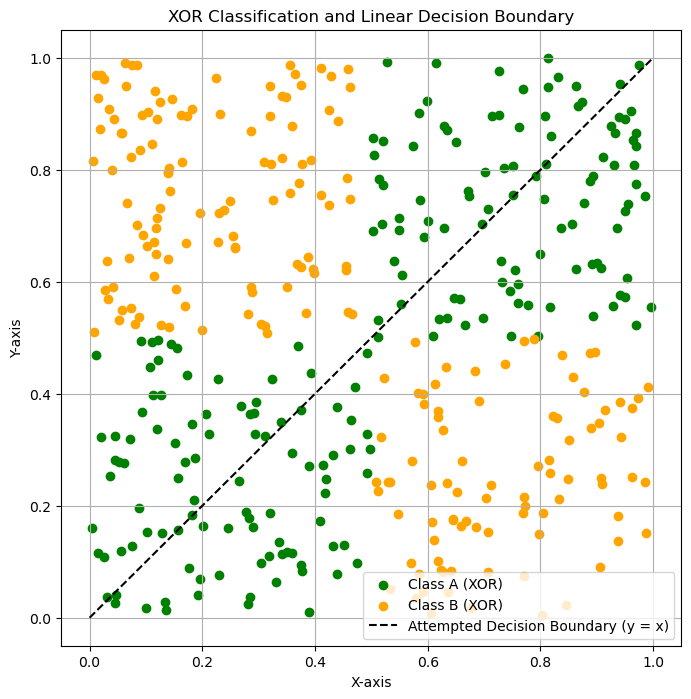

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A_xor[:, 0], class_A_xor[:, 1], color='green', label='Class A (XOR)')
plt.scatter(class_B_xor[:, 0], class_B_xor[:, 1], color='orange', label='Class B (XOR)')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Attempted Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('XOR Classification and Linear Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Prepare the data
X = np.concatenate([class_A_xor, class_B_xor])
y = np.array([0] * len(class_A_xor) + [1] * len(class_B_xor))

In [10]:
# Create a simple neural network
model = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

In [11]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the model
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4950
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.4875
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.4925
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5150
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5300
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5575
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5575
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5550
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5550
Epoch 11/

13/13 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.6625
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.6625
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6625
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6625
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6135 - accuracy: 0.6650
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6650
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6650
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6650
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6675
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.6675
Epoch 93/100


In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test accuracy:', accuracy)

13/13 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.6800
Test accuracy: 0.6800000071525574


In [15]:
# Create a meshgrid of points to evaluate the model
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [16]:
# Predict the class probabilities for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

113/113 [==============================] - 0s 864us/step


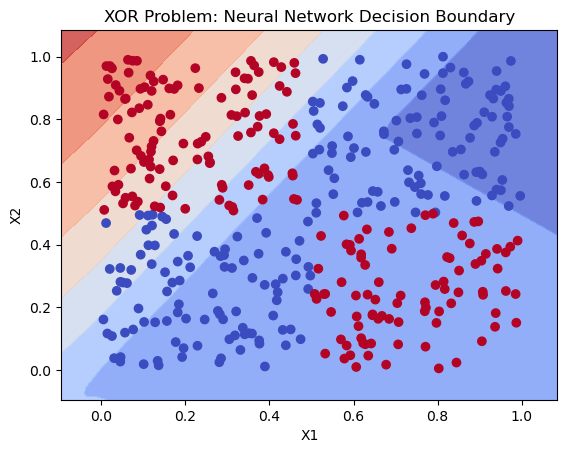

In [18]:
# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Problem: Neural Network Decision Boundary')
plt.show()

In [20]:
from tensorflow.keras.layers import Dropout


# Create a more complex neural network with dropout
model = Sequential([
    Dense(16, activation='relu', input_dim=2),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [21]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train the model
model.fit(X, y, epochs=200, batch_size=32)

Epoch 1/200
13/13 [==============================] - 1s 1ms/step - loss: 0.7031 - accuracy: 0.4850
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4800
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5025
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5600
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5825
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5650
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6175
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5650
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5475
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6050
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8025
Epoch 84/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.7825
Epoch 85/200
13/13 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8175
Epoch 86/200
13/13 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7700
Epoch 87/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.7850
Epoch 88/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8150
Epoch 89/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8025
Epoch 90/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8050
Epoch 91/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7925
Epoch 92/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8075
Epoch 93/200


13/13 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8125
Epoch 165/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8000
Epoch 166/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8250
Epoch 167/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8025
Epoch 168/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8275
Epoch 169/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8300
Epoch 170/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8300
Epoch 171/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8275
Epoch 172/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8300
Epoch 173/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8125
Epoc

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test accuracy:', accuracy)

13/13 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.8750
Test accuracy: 0.875


In [24]:
# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

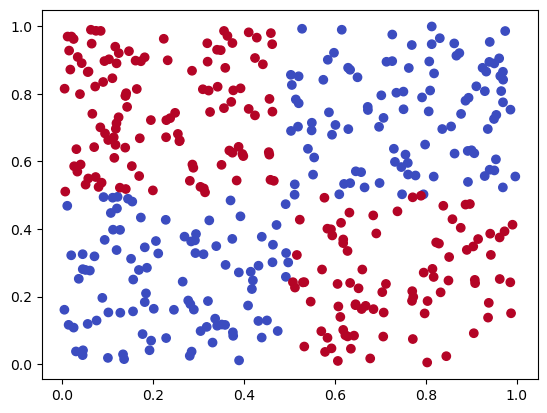

In [25]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, label='Data Points')

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02)) 

In [26]:
# Predict the class probabilities for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

113/113 [==============================] - 0s 839us/step


C:\Users\14184\AppData\Local\Temp\ipykernel_27660\3443204285.py:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, label='Decision Boundary')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


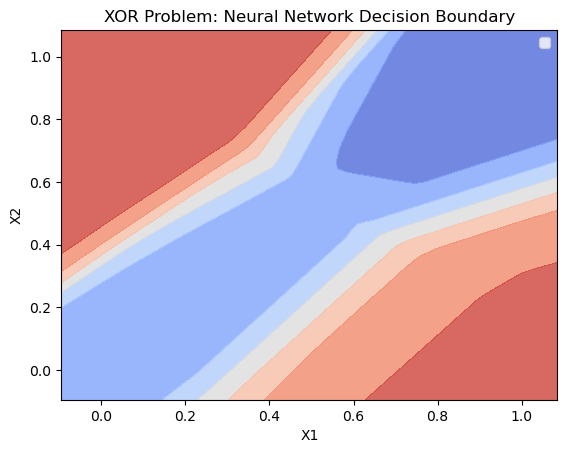

In [28]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Problem: Neural Network Decision Boundary')
plt.legend()
plt.show()